In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from pylab import rcParams
rcParams["figure.figsize"] = 8,6

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/AlmaBetter/Machine Learning/Supervised Learning/Classification Algorithms/Decision Trees/Ensemble of Decision Trees/creditcard.csv"

In [4]:
data = pd.read_csv(path)

#<b> The dataset has credit card transactions where our objective is to identify the fraudulent transactions.

In [5]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


In [6]:
# Checking the shape of data
data.shape

(56962, 30)

In [7]:
# checking the value counts of the dependent variable
data.Target.value_counts()

0    56864
1       98
Name: Target, dtype: int64

In [8]:
# Creating a dataset with all the independent variables
X = data.iloc[:,:-1]

# Creating a dataset with the dependent variable
y = data.iloc[:,-1]

* Split the dataset into train and test using stratified sampling on our dependent variable as the data is heavily imbalanced.
* Using a stratified sampling ensures the distribution of dependent variable remains same across train and test datasets

In [9]:
# Splitting the data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [10]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(45569, 29)

 The shape of test dataset :
(11393, 29)


In [11]:
print("Distribution of classes of dependent variable in train :")
print(y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(y_test.value_counts())

Distribution of classes of dependent variable in train :
0    45491
1       78
Name: Target, dtype: int64

 Distribution of classes of dependent variable in test :
0    11373
1       20
Name: Target, dtype: int64


# <B> Random Forest

In [12]:
# Hyperparameter tuning
classifier = RandomForestClassifier()
grid_values = {"n_estimators":[50, 80, 100], "max_depth": [3,5,7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = "roc_auc", cv=5)

# Fit the object to train dataset
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

Predicting on both train and test dataset using the fitted model

In [13]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [14]:
# Accuracy score for train data
accuracy_score(y_train,train_preds)

0.9996269393666747

In [15]:
# Accuracy for test data
accuracy_score(y_test,test_preds)

0.9993855876415343

Accuracy is not a good metric to evaluate our model since the dataset is heavily imbalanced. Thus we will use roc_auc score

In [16]:
# roc_auc score for train data
roc_auc_score(y_train,train_preds)

0.891025641025641

In [17]:
# roc_auc score for test data
roc_auc_score(y_test,test_preds)

0.8499560362261496

In [18]:
# Confusion matrix for train data
confusion_matrix(y_train,train_preds)

array([[45491,     0],
       [   17,    61]])

In [19]:
# Confusion matrix for test data
confusion_matrix(y_test, test_preds)

array([[11372,     1],
       [    6,    14]])

### ROC Curve

In [35]:
y_score1 = classifier.predict_proba(X_test)[:,1]

In [36]:
from sklearn.metrics import roc_curve
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

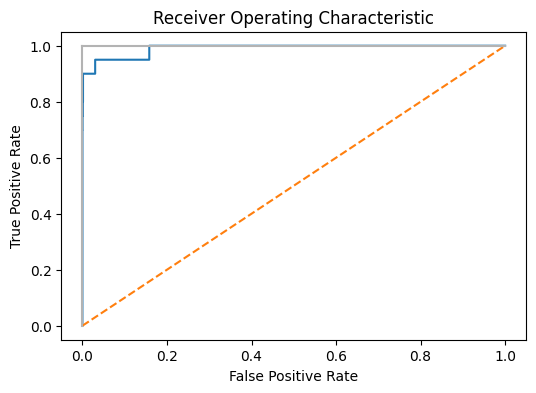

In [39]:
plt.subplots(1, figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# <b>Gradient Boosting

In [40]:
# Hyperparameter tuning
classifier_2 = GradientBoostingClassifier()
grid_values = {"n_estimators": [50,80,100], "max_depth": [3,5,7]}
classifier_2 = GridSearchCV(classifier_2, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train data
classifier_2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

Predicting on both train and test dataset using the fitted model

In [41]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [42]:
# Obtain accuracy on train set
accuracy_score(y_train,train_preds)

0.9996269393666747

In [43]:
# Obtain accuracy on test set
accuracy_score(y_test,test_preds)

0.9993855876415343

Accuracy is not a good metric to evaluate our model since the dataset is heavily imbalanced. Thus we will use roc_auc score

In [44]:
# Calculate roc_auc score on train set
roc_auc_score(y_train,train_preds)

0.891025641025641

In [45]:
# Calculate roc_auc score on test set
roc_auc_score(y_test,test_preds)

0.8499560362261496

In [46]:
# Obtain the confusion matrix on train set
confusion_matrix(y_train,train_preds)

array([[45491,     0],
       [   17,    61]])

In [47]:
# Obtain the confusion matrix on test set
confusion_matrix(y_test,test_preds)

array([[11372,     1],
       [    6,    14]])

## ROC Curve

In [48]:
y_score2 = classifier_2.predict_proba(X_test)[:,1]

In [49]:
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

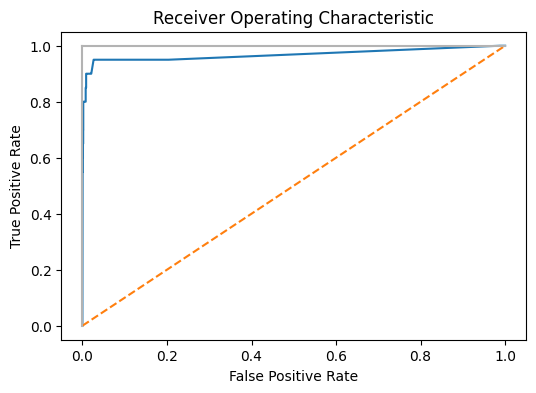

In [51]:
plt.subplots(1, figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()